<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Radiance-and-reflectance" data-toc-modified-id="Radiance-and-reflectance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Radiance and reflectance</a></span></li></ul></div>

# Radiance and reflectance

In [1]:
import a301
from pathlib import Path
#import rasterio
from IPython.display import Image
from a301.landsat.landsat_metadata import landsat_metadata
from a301.landsat.toa_radiance import toa_radiance_8
from a301.landsat.toa_reflectance import toa_reflectance_8
from PIL import Image as pil_image
from PIL.TiffTags import TAGS
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float
from skimage import exposure

june_2015= a301.test_dir / Path('landsat8/LC80470262015165LGN02')
may_2015=a301.test_dir / Path("landsat_2018_05_13")
data_dir=june_2015
tiff_file=list(data_dir.glob("*B1.TIF"))[0]
meta_file=list(data_dir.glob("*MTL.txt"))[0]
#jpeg_file=list(data_dir.glob("*T1.jpg"))[0]

Scene LC80470262015165LGN02 center time is 2015-06-14 19:00:43
[1, 2, 3]


/Users/phil/mb36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


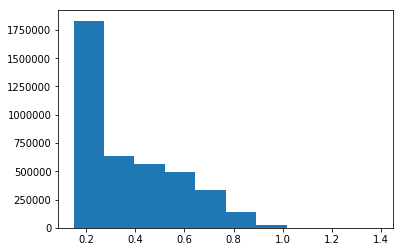

In [2]:
%matplotlib inline
refl=toa_reflectance_8([1,2,3],meta_file)
print(list(refl.keys()))
hit1 = ~np.isnan(refl[1])
hit2 = refl[1] > 1.5e-1
hit=np.logical_and(hit1,hit2)
plt.hist(refl[1][hit].ravel());

Scene LC80470262015165LGN02 center time is 2015-06-14 19:00:43
working on band 1
working on band 2
working on band 3


/Users/phil/mb36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


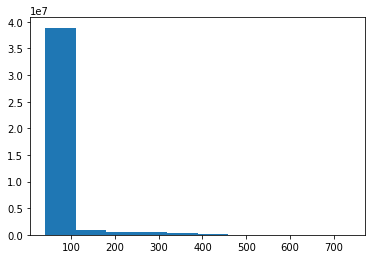

In [3]:
rad=toa_radiance_8([1,2,3],meta_file)
hit1 = ~np.isnan(rad[1])
hit2 = rad[1] > 1.5e-1
hit=np.logical_and(hit1,hit2)
plt.hist(rad[1][hit].ravel());